<function matplotlib.pyplot.show(close=None, block=None)>

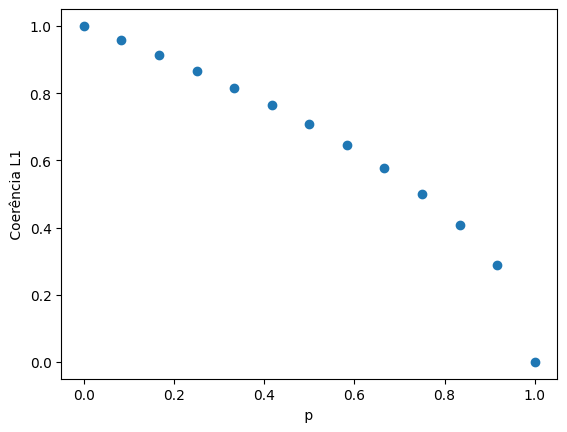

In [5]:
'''                                  ReadMe                                                      '''
'''# Nessa célula vamos apenas mudar a função geradora do estado a ser preparado                 '''
'''# Basta alterar a função que gera o estado, nesse caso target_op = init_state_ref(n_qubits, p)'''

import cmath
from torch import tensor
from numpy import sin,cos,sqrt,outer,zeros, pi

from theoric.ad_theoric import *
from src.vqa_tools import general_vqacircuit_penny 
from src.generalize import *

def state_amplitude_damping(theta, phi, p):
    state = zeros(4,dtype=complex)    
    state[0] = cos(theta/2)
    state[1] = sqrt(p)
    state[2] = sqrt(1-p)*cmath.exp(1j*phi)*sin(theta/2)
    target_op = outer(state.conj(), state)
    target_op = tensor(target_op)
    return target_op


def run_calcs(list_p, epochs):
    coerencias_R = []
    coerencias_L = []
    pretrain = True
    count = 0
    n_qubits = 2
    depht = 3
    _, params, _, _ = start_things(n_qubits, depht)
    for p in list_p:
        print(f'{count} de {len(list_p)}')
        count += 1

        circuit, _ = general_vqacircuit_penny(n_qubits, depht)

        #_, target_op = init_state_ref(n_qubits, p)
        #_, target_op = init_state_bpf(n_qubits, p)
        target_op = state_amplitude_damping(pi/2, 0, p)

        qc, qr, params = optmize(epochs, n_qubits, circuit, params, target_op, pretrain,70)
        pretrain = False
        rho = tomograph(qc, qr)
        #print(rho)
        coerencias_L, coerencias_R = results(rho, coerencias_R, coerencias_L)

    plot_theoric_ad()
    plots(list_p, coerencias_R, coerencias_L)

plot_theoric_ad()
plt.xlabel(' p ')
plt.ylabel(' Coerência L1 ')
plt.show

# Results


In [6]:
#list_p = [0,0.25,0.5,0.75,1]
list_p = np.linspace(0,1,5)
print(list_p)
run_calcs(list_p, 35)

[0.   0.25 0.5  0.75 1.  ]
0 de 5


IndexError: index 24 is out of bounds for dimension 0 with size 24

In [14]:
list_p = np.linspace(0,1,5)
print(list_p)

[0.   0.25 0.5  0.75 1.  ]
